In [6]:
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import save_image
from generator import botr_generator
import matplotlib.pyplot as plt
from utils import load_coco_categories

In [2]:
coco_dset = torchvision.datasets.CocoDetection(
    "val2017",
    "annotations/stuff_val2017.json", 
    transform=transforms.ToTensor())

coco_categories = load_coco_categories()

botr_gen = botr_generator(
    coco_dset,
    coco_categories,
    dims=(1024,1024),
    batch_size=4,
    fill_target=0.99,
    max_step_fill=0.1,
    step_fill_jitter=0.5,
    for_nn=True)

loading annotations into memory...
Done (t=0.43s)
creating index...
index created!


In [3]:
print(coco_categories.keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90])


test image generator

In [9]:
# not sure why the categories don't line up, remove -100 offset and fix later
image_batch, categories = next(botr_gen)
print(image_batch.shape)

torch.Size([4, 3, 1024, 1024])


torch.Size([3, 1024, 1024]) {'supercategory': 'food', 'id': 55, 'name': 'orange'}


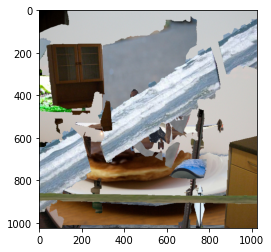

torch.Size([3, 1024, 1024]) {'supercategory': 'food', 'id': 54, 'name': 'sandwich'}


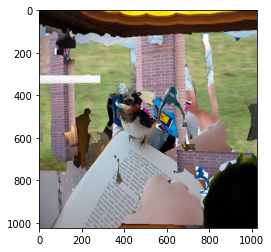

torch.Size([3, 1024, 1024]) {'supercategory': 'accessory', 'id': 27, 'name': 'backpack'}


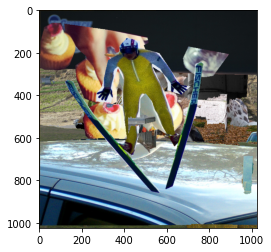

torch.Size([3, 1024, 1024]) {'supercategory': 'furniture', 'id': 64, 'name': 'potted plant'}


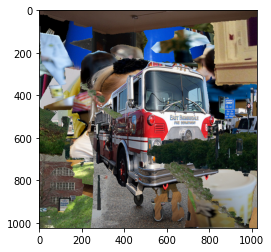

In [5]:
for img, cat in zip(image_batch, categories):
    print(img.shape, cat)
    save_image(img.permute(2, 0, 1), 'generated/img1.png')
    plt.imshow(img.permute(1,2,0))
    plt.show()

In [2]:
import json

json_file = "annotations/instances_val2017.json"

In [4]:
from utils import load_coco_categories

categories = load_coco_categories()

print(categories.keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90])
